<font size=6>**《动手学深度学习》**</font>
![](http://zh.d2l.ai/_images/frontpage/front.jpg)

# 预备知识

## 数据操作
在Mxnet中，NDArray是一个类，也是存储和变换数据的主要工具。NDArray和Numpy的多为数组很类似，然而NDArray提供了GPU计算和**自动求梯度**等更多功能。

### 创建NDArray

* 从MxNet中导入ndarray模块，缩写nd

In [1]:
import mxnet.ndarray as nd

* 使用arange函数创建一个行向量

In [2]:
x=nd.arange(12)
x


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>

@cpu(0)代表被创建在cpu使用的内存上

In [4]:
x.shape,x.size

((12,), 12)

* 通过reshape改变向量形状

In [6]:
X=x.reshape((3,4))
X


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

上面也可以通过x.reshape((-1,4))或x.reshape((3,-1))来创建，由于x的数量已知，这里的-1可以自动算出。

* 创建一个全为0张量，形状为（2，3，4）

In [7]:
nd.zeros((2,3,4))


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
<NDArray 2x3x4 @cpu(0)>

* 类似的创建全为1的张量

In [8]:
nd.ones((3,4))


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @cpu(0)>

* 可以通过list列表来创建ndarray

In [13]:
Y=nd.array([[1,2,3,5],[4,5,6,3],[8,9,10,11]])
Y


[[ 1.  2.  3.  5.]
 [ 4.  5.  6.  3.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

* 生成随机数张量，random_normal生成均值为0，标准差为1的正太分布

In [15]:
nd.random_normal(0,1,shape=(3,4))


[[-0.5916499   0.85860497 -0.22794183  0.20131476]
 [ 0.3500547   0.5360521   1.5194443   1.9040879 ]
 [-1.5734432  -0.14007866  0.29670075  1.3111951 ]]
<NDArray 3x4 @cpu(0)>

### 运算

* 按元素加

In [16]:
X+Y


[[ 1.  3.  5.  8.]
 [ 8. 10. 12. 10.]
 [16. 18. 20. 22.]]
<NDArray 3x4 @cpu(0)>

* 按元素乘

In [17]:
X*Y


[[  0.   2.   6.  15.]
 [ 16.  25.  36.  21.]
 [ 64.  81. 100. 121.]]
<NDArray 3x4 @cpu(0)>

* 按元素除

In [18]:
X/Y


[[0.        0.5       0.6666667 0.6      ]
 [1.        1.        1.        2.3333333]
 [1.        1.        1.        1.       ]]
<NDArray 3x4 @cpu(0)>

* 按元素做指数运算

In [19]:
Y.exp()


[[2.7182817e+00 7.3890562e+00 2.0085537e+01 1.4841316e+02]
 [5.4598148e+01 1.4841316e+02 4.0342880e+02 2.0085537e+01]
 [2.9809580e+03 8.1030840e+03 2.2026465e+04 5.9874141e+04]]
<NDArray 3x4 @cpu(0)>

In [20]:
nd.exp(Y)


[[2.7182817e+00 7.3890562e+00 2.0085537e+01 1.4841316e+02]
 [5.4598148e+01 1.4841316e+02 4.0342880e+02 2.0085537e+01]
 [2.9809580e+03 8.1030840e+03 2.2026465e+04 5.9874141e+04]]
<NDArray 3x4 @cpu(0)>

* 做矩阵乘法

In [21]:
nd.dot(X,Y.T)


[[ 23.  26.  62.]
 [ 67.  98. 214.]
 [111. 170. 366.]]
<NDArray 3x3 @cpu(0)>

* 做ndarray的连接(concat)，在行上连接 dim=0,在列上连接 dim=1

In [22]:
X,Y

(
 [[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]
 <NDArray 3x4 @cpu(0)>, 
 [[ 1.  2.  3.  5.]
  [ 4.  5.  6.  3.]
  [ 8.  9. 10. 11.]]
 <NDArray 3x4 @cpu(0)>)

In [23]:
nd.concat(X,Y,dim=0)


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [ 1.  2.  3.  5.]
 [ 4.  5.  6.  3.]
 [ 8.  9. 10. 11.]]
<NDArray 6x4 @cpu(0)>

In [25]:
nd.concat(X,Y,dim=1)


[[ 0.  1.  2.  3.  1.  2.  3.  5.]
 [ 4.  5.  6.  7.  4.  5.  6.  3.]
 [ 8.  9. 10. 11.  8.  9. 10. 11.]]
<NDArray 3x8 @cpu(0)>

* 使用条件判别式可得元素为0或1的ndarray。bool运算

In [26]:
X==Y


[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @cpu(0)>

* 对ndarray中所有元素进行求和

In [27]:
X.sum()


[66.]
<NDArray 1 @cpu(0)>

按行求和

In [41]:
X.sum(axis=0)


[12. 15. 18. 21.]
<NDArray 4 @cpu(0)>

按列求和

In [42]:
X.sum(axis=1)


[ 6. 22. 38.]
<NDArray 3 @cpu(0)>

* 可以通过asscalar函数将结果变成python中的标量，如下将X的2范数变成python中标量

In [44]:
X.norm()


[22.494442]
<NDArray 1 @cpu(0)>

In [45]:
X.norm().asscalar()

22.494442

### 广播机制

* 对于形状不同的ndarray做运算，可能会触发广播机制，先适当的赋值元素，使其形状相同。

In [46]:
A=nd.arange(3).reshape((3,1))
B=nd.arange(2).reshape((1,2))
A,B

(
 [[0.]
  [1.]
  [2.]]
 <NDArray 3x1 @cpu(0)>, 
 [[0. 1.]]
 <NDArray 1x2 @cpu(0)>)

由于A B分别是3行1列和1行2列的矩阵，如果计算A+B，那么A中第一列的三个元素会被广播到第二列，B中的第一行2个元素会被广播到第二行和第三行，在相加。
A被广播成
$
   \left[
   \begin{matrix}
   0 & 0 \\
   1 & 1 \\
   2 & 2 
  \end{matrix} 
  \right]
$
B被广播成
$
   \left[
   \begin{matrix}
   0 & 1 \\
   0 & 1 \\
   0 & 1 
  \end{matrix} 
  \right]
$

In [47]:
A+B


[[0. 1.]
 [1. 2.]
 [2. 3.]]
<NDArray 3x2 @cpu(0)>

### 索引
ndarray元素的索引从0开始。

* 截取行索引

In [48]:
X[1:3]


[[ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 2x4 @cpu(0)>

* 单个元素访问

In [49]:
X[1,2]


[6.]
<NDArray 1 @cpu(0)>

* 对某行赋值

In [50]:
X[1:2,:]=12
X


[[ 0.  1.  2.  3.]
 [12. 12. 12. 12.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

* 获取某列

In [51]:
X[:,1:2]


[[ 1.]
 [12.]
 [ 9.]]
<NDArray 3x1 @cpu(0)>

### 运算的内存开销

前面的例子，我们对每个操作的结果都开辟了新的内存来存储，如：Y=X+Y这样的运算，我们也会开辟新的内存，然后Y指向新的内存。

In [52]:
beforce=id(Y)
Y=Y+X
id(Y)==beforce

False

如果项指定结果到指定内存，我们可以使用索引来进行替换操作。如：我们先通过zeros_like创建和Y形状一样元素为0的数组Z，接下来，把X+Y的结果通过[:]写进内存中。

In [53]:
Z=Y.zeros_like()
beforce=id(Z)
Z[:]=X+Y
id(Z)==beforce

True

实际上上例还是为X+Y开辟了临时内存来存储计算结果，再复制到Z对应得内存中，如果要避免这个临时内存开销，可以使用运算符全函数名中得out参数。

In [54]:
nd.elemwise_add(X,Y,out=Z)
id(Z)==beforce

True

如果X再之后不再使用，我们可以使用X[:]=X+Y或X+=Y来减小运算得内存开销。

In [55]:
beforce=id(X)
X+=Y
id(X)==beforce

True

### NDArray和Numpy相互转换

* 通过array函数和asnumpy函数令数据在ndarray和numpy格式之间相互变换。

In [59]:
import numpy as np
p=np.ones((2,3))
d=nd.array(p)
d


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [60]:
d.asnumpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)


[[ 1.  4.  7. 11.]
 [28. 29. 30. 27.]
 [24. 27. 30. 33.]]
<NDArray 3x4 @cpu(0)>

## 自动求梯度
使用mxnet的autograd模块来自动求梯度。

In [1]:
from mxnet import autograd,nd

### 简单的例子
* 对函数$y=2x^Tx$求关于列向量x的梯度。我们先创建变量x,并赋初始值。

In [2]:
x=nd.arange(4).reshape((4,1))
x


[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>

* 为了求梯度，我们需要先调用attach_grad函数来申请存储梯度所需的内存。 x.grad

In [3]:
x.attach_grad()

* 定义有关变量x的函数。为了减小计算内存的开销，默认条件下mxnet不会记录用于求梯度的计算，我们需要调用record函数来要求mxnet记录与梯度有关的计算。

In [4]:
with autograd.record():
    y=2*nd.dot(x.T,x)

* 接下来通过调用backward函数自动求梯度。注意，如果y不是一个标量，mxnet将默认对y中的元素求和得到新的变量，在求改变量有关x的梯度。

backward可传入参数头梯度，头梯度就相当于系数，求完梯度后再乘以头梯度。

In [5]:
y.backward()

* 函数$y=2x^Tx$关于x的梯度维4x,检验正确性。

In [7]:
assert (x.grad-4*x).norm().asscalar()==0
x.grad


[[ 0.]
 [ 4.]
 [ 8.]
 [12.]]
<NDArray 4x1 @cpu(0)>

### 训练模式和测试模式

* 从上看到，在调用record函数后，mxnet会记录并计算梯度，此外默认情况下autograd还会将运行模式从预测模式转换为训练模式，可通过is_training函数来查看。

In [8]:
print(autograd.is_training())
with autograd.record():
    print(autograd.is_training())

False
True


### 对python控制流进行求梯度
即使函数包含python控制流，如条件和循环，也有可能对变量求梯度。

* 如下程序<br/>

In [9]:
def f(a):
    b=a*2
    while b.norm().asscalar()<1000:
        b=b*2
    if b.sum().asscalar()>0:
        c=b
    else:
        c=100*b
    return c

* 使用record函数记录计算，并调用backward函数梯度。

In [10]:
a=nd.random.normal(shape=1)
a.attach_grad()
with autograd.record():
    c=f(a)
c.backward()

上述函数其实对于任意给定的a,其输出必然为f(a)=x*a的形式，x的取值取决于a,c=f(a)关于a的梯度维x,x=c/a.

In [12]:
a.grad==c/a


[1.]
<NDArray 1 @cpu(0)>

### 小练习

x不再维标量，看求梯度的结果。

In [14]:
x=nd.random.normal(0,1,shape=5)
x


[-0.5459446  -2.3556297   0.54144025  2.6785064   1.2546344 ]
<NDArray 5 @cpu(0)>

In [15]:
x.attach_grad()

In [19]:
with autograd.record():
    c=f(x)
c.backward()
c,x.grad==c/x

(
 [ -279.52362 -1206.0824    277.2174   1371.3953    642.3728 ]
 <NDArray 5 @cpu(0)>, 
 [1. 1. 1. 1. 1.]
 <NDArray 5 @cpu(0)>)

重新设计一个对控制流求梯度的例子，并运行。

In [30]:
def fun(x):
    b=nd.power(x,3)
    if b.norm()>0:
        c=b+x
    else:
        c=b
    return c

In [36]:
x=nd.random.normal(0,1,shape=(2,2))
print(x)
x.attach_grad()
with autograd.record():
    c=fun(x)
c.backward()
c,x.grad


[[ 1.9040879  -1.5734432 ]
 [-0.14007866  0.29670075]]
<NDArray 2x2 @cpu(0)>


(
 [[ 8.807455   -5.468853  ]
  [-0.14282729  0.3228197 ]]
 <NDArray 2x2 @cpu(0)>, 
 [[11.876652   8.427171 ]
  [ 1.0588661  1.264094 ]]
 <NDArray 2x2 @cpu(0)>)

## 查阅文档

* 查找模块里所有函数和类。
<br/>**dir**函数打印模块中所有成员或属性。

In [37]:
print(dir(nd.random))

['NDArray', '_Null', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_internal', '_random_helper', 'current_context', 'exponential', 'exponential_like', 'gamma', 'gamma_like', 'generalized_negative_binomial', 'generalized_negative_binomial_like', 'multinomial', 'negative_binomial', 'negative_binomial_like', 'normal', 'normal_like', 'numeric_types', 'poisson', 'poisson_like', 'randn', 'shuffle', 'uniform', 'uniform_like']


* 查找特定函数和类的使用。
<br/>help函数。

In [38]:
help(nd.ones_like)

Help on function ones_like:

ones_like(data=None, out=None, name=None, **kwargs)
    Return an array of ones with the same shape and type
    as the input array.
    
    Examples::
    
      x = [[ 0.,  0.,  0.],
           [ 0.,  0.,  0.]]
    
      ones_like(x) = [[ 1.,  1.,  1.],
                      [ 1.,  1.,  1.]]
    
    
    
    Parameters
    ----------
    data : NDArray
        The input
    
    out : NDArray, optional
        The output NDArray to hold the result.
    
    Returns
    -------
    out : NDArray or list of NDArrays
        The output of this function.



在jupyter notebook中还可以使用？来查看。

# 深度学习基础

## 线性回归

### 模型
* 以预测房价为例，设房屋面积为$x_1$，房龄为$x_2$，售价为y.建立线性模型:$\hat{y}=x_1w_1+x_2w_2+b$

### 适量计算表达式

* 先定义两个1000维的向量

In [39]:
from mxnet import nd
from time import time

a=nd.ones(shape=1000)
b=nd.ones(shape=1000)

* 向量相加一种方式是使用循环，一个一个加

In [41]:
start=time()
c=nd.zeros(shape=1000)
for i in range(1000):
    c[i]=a[i]+b[i]
time()-start

0.14557099342346191

* 直接矢量加

In [43]:
start=time()
d=a+b
time()-start

0.0

可以看到适量运算更快，应尽量使用矢量运算。

## 线性回归从0开始实现

In [44]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random
%matplotlib inline

* 生成数据集<br/>
设训练数据集样本数维1000，特征数为2，给定随机生成的批量样本特征X，使用线性回归模型的真实权值$w=[2,-3.4]^T$和偏置b=4.，以及一个随机噪声项$\xi$来生成：$y=Xw+b+\xi$ 。$\xi$服从均值为0，标准差为0.01的正态分布。 

In [45]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)

In [46]:
features[0],labels[0]

(
 [1.3111951 0.5035904]
 <NDArray 2 @cpu(0)>, 
 [5.098045]
 <NDArray 1 @cpu(0)>)

* 通过生成第二特征features[:,1]和标签的散点图，可视化。

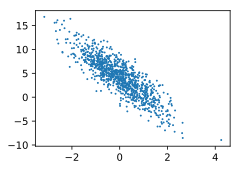

In [49]:
def use_svg_display():
    #用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #设置图的尺寸
    plt.rcParams["figure.figsize"]=figsize

set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1)
plt.show()

### 读取数据
定义一个函数，它每次返回bath_size个随机样本的特征和标签。

In [50]:
def data_iter(batch_size,features,labels):
    num_examples=len(labels)
    indices=list(range(num_examples))
    random.shuffle(indices)#打乱读取样本的顺序
    for i in range(0,num_examples,batch_size):
        j=nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j),labels.take(j) #take根据索引返回对应元素。

In [51]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break


[[ 0.12447102 -0.83142215]
 [-0.72800314  0.16671401]
 [ 0.68472004  0.07112197]
 [-0.21175045  0.21140845]
 [-1.4682876   0.56517833]
 [ 1.0059307  -0.41143978]
 [ 0.31394115 -0.7616973 ]
 [ 1.9934888  -0.69797784]
 [ 0.38896656 -0.6177039 ]
 [-1.4248496   1.634742  ]]
<NDArray 10x2 @cpu(0)> 
[ 7.28169    2.1735208  5.3300967  3.0574906 -0.6382029  7.6126523
  7.40649   10.562869   7.069023  -4.2019567]
<NDArray 10 @cpu(0)>


### 初始化模型参数
权值初始化为0，标准差初始化为0.01的正态随机数，偏值初始化为0.

In [63]:
w=nd.random.normal(0,0.01,shape=(num_inputs,1))
b=nd.zeros(shape=(1,))

* 创建梯度存储

In [64]:
w.attach_grad()
b.attach_grad()

### 定义模型

In [65]:
def linreg(X,w,b):
    return nd.dot(X,w)+b

### 定义损失函数

In [66]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

### 定义优化算法

In [29]:
def sgd(params,lr,batch_size):
    for param in params:
        param[:]=param-lr*param.grad/batch_size

### 训练模型

In [72]:
lr=0.01
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            los=loss(net(X,w,b),y)
        los.backward()
        sgd([w,b],lr,batch_size)
    train_los=loss(net(features,w,b),labels)
    print("epoch %d,loss %f" % (epoch+1,train_los.mean().asnumpy()))

epoch 1,loss 0.000049
epoch 2,loss 0.000049
epoch 3,loss 0.000049


In [73]:
true_w,w

([2, -3.4], 
 [[ 1.9995731]
  [-3.400302 ]]
 <NDArray 2x1 @cpu(0)>)

In [74]:
true_b,b

(4.2, 
 [4.2003536]
 <NDArray 1 @cpu(0)>)

## 线性回归的简洁实现
本节中，介绍如何使用mxnet提供的gluon接口方便的实现线性回归的训练。

### 生成数据集。

In [75]:
from mxnet import autograd,nd

num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)

### 读取数据
gluon提供了data包来读取数据

In [77]:
from mxnet.gluon import data as gdata

batch_size=10
dataset=gdata.ArrayDataset(features,labels)
data_iter=gdata.DataLoader(dataset,batch_size,shuffle=True)#产生迭代器

In [78]:
for X ,y in data_iter:
    print(X,y)
    break


[[ 0.10585944 -0.1019052 ]
 [ 0.69617146 -0.55232257]
 [-1.0263944   0.69616556]
 [-0.48195156 -1.5287803 ]
 [-0.9410246  -0.42550325]
 [-0.7549326   0.4500242 ]
 [-0.66239274  0.9907141 ]
 [-1.7287835  -0.3144504 ]
 [ 1.0692734  -0.78889465]
 [-0.05699581 -0.7767584 ]]
<NDArray 10x2 @cpu(0)> 
[ 4.7503943   7.468627   -0.21006174  8.432943    3.7647274   1.1663966
 -0.4879959   1.8093932   9.014106    6.7289877 ]
<NDArray 10 @cpu(0)>


### 定义模型

* 首先导入nn模块，实际上nn式neural network的缩写，该模块定义了大量的神经网络的层。先定义一个模型变量net，它是一个Sequential实例。Sequential实例可以看成式一个串联各层的容器。再构造模型时，我在该容器中一次添加层。当给定输入数据时，容器中的每一层将一次计算并将输出作为下一层的输入。

In [79]:
from mxnet.gluon import nn

net=nn.Sequential()

* 加入一个全连接层

In [80]:
net.add(nn.Dense(1))

In [81]:
nn.Dense?

在gluon中无需指定输入的形状，如线性回归的输入特征的个数，他会自动的判别每层的输入个数。

### 初始化模型参数

* 从mxnet导入init模块，该模块提供了模型参数初始化的方法。使用init.Normal(sigma=0.01)指定权值参数每个元素将在初始化时随机采样于均值为0，标准差为0.01的正太分布。，偏置初始化为0.

In [82]:
from mxnet import init

net.initialize(init.Normal(sigma=0.01))

### 定义损失函数
* 在gluon中loss模块定义了各种损失函数。

In [83]:
from mxnet .gluon import loss as gloss

loss=gloss.L2Loss()

### 定义优化算法
* 导入gluon，并创建Trainer实例，并指定学习率为0.03的sgd为优化算法。net中的参数可以通过collect_params函数获取。

In [84]:
from mxnet import gluon

trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.03})

### 训练模型
* 调用Trianer实例的step函数来迭代模型参数。上一节中我们提到，由于变量l是长度为batch_size的一维NDArray，执行l.backward()等价于执行l.sum().backward()。按照小批量随机梯度下降的定义，我们在step函数中指明批量大小，从而对批量中样本梯度求平均。

In [98]:
num_epochs=5
for epoch in range(num_epochs):
    for X,y in data_iter:
        with autograd.record():
            los=loss(net(X),y)
        los.backward()
        trainer.step(batch_size)
    los=loss(net(features),labels)
    print('epoch %d,loss %f' % (epoch,los.mean().asnumpy()))

epoch 0,loss 0.000051
epoch 1,loss 0.000051
epoch 2,loss 0.000051
epoch 3,loss 0.000051
epoch 4,loss 0.000051


从net获取层

In [99]:
dense=net[0]

true_w,dense.weight.data()

([2, -3.4], 
 [[ 2.0003297 -3.3996866]]
 <NDArray 1x2 @cpu(0)>)

In [88]:
true_b,dense.bias.data()

(4.2, 
 [4.1994452]
 <NDArray 1 @cpu(0)>)

In [97]:
dense.weight.grad(),dense.bias.grad()

(
 [[-0.00168679 -0.03963831]]
 <NDArray 1x2 @cpu(0)>, 
 [0.00760929]
 <NDArray 1 @cpu(0)>)

## softmax回归

## 图像分类数据集（Fashion-MNIST）
图像分类数据集中最常用的是手写数字识别数据集MNIST [1]。但大部分模型在MNIST上的分类精度都超过了95%。为了更直观地观察算法之间的差异，我们将使用一个图像内容更加复杂的数据集Fashion-MNIST [2]。

### 获取数据集

In [1]:
import d2lzh as d2l
from mxnet.gluon import data as gdata
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline

* 使用data下载数据

In [2]:
mnist_train=gdata.vision.FashionMNIST(train=True)
mnist_test=gdata.vision.FashionMNIST(train=False)

In [3]:
len(mnist_train),len(mnist_test)

(60000, 10000)

* 获取第一个样本的图像和标签

In [4]:
feature,label=mnist_train[0]

In [5]:
feature.shape,feature.dtype

((28, 28, 1), numpy.uint8)

变量feature对应高和宽均为28像素的图像。每个像素的数值为0到255之间8位无符号整数（uint8）。它使用三维的NDArray存储。其中的最后一维是通道数。因为数据集中是灰度图像，所以通道数为1。为了表述简洁，我们将高和宽分别为 h 和 w 像素的图像的形状记为 h×w 或（h，w）。

In [6]:
label,type(label),label.dtype

(2, numpy.int32, dtype('int32'))

Fashion-MNIST中一共包括了10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。以下函数可以将数值标签转成相应的文本标签。

In [7]:
def get_fashion_mnist_labels(labels):
    text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

定义一个可以在一行里画出多张图像和对应标签的函数。

In [13]:
from IPython import  display
def show_fashion_mnist(images,labels):
    display.set_matplotlib_formats('svg')
    _,figs=plt.subplots(1,len(images),figsize=(12,12))
    for f ,img,lbl in zip(figs,images,labels):
        f.imshow(img.reshape((28,28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

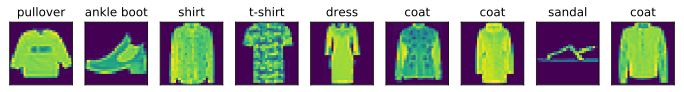

In [14]:
X,y=mnist_train[0:9]
show_fashion_mnist(X,get_fashion_mnist_labels(y))

### 读取小批量

Gluon的DataLoader中一个很方便的功能是允许使用多进程来加速数据读取（暂不支持Windows操作系统）。这里我们通过参数num_workers来设置4个进程读取数据。

此外，我们通过ToTensor实例将图像数据从uint8格式变换成32位浮点数格式，并除以255使得所有像素的数值均在0到1之间。ToTensor实例还将图像通道从最后一维移到最前一维来方便之后介绍的卷积神经网络计算。通过数据集的transform_first函数，我们将ToTensor的变换应用在每个数据样本（图像和标签）的第一个元素，即图像之上。

In [15]:
batch_size=256
transformer=gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    num_workers=0
else:
    num_workers=4
    
train_iter=gdata.DataLoader(mnist_train.transform_first(transformer),batch_size,shuffle=True,num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False,num_workers=num_workers)

In [16]:
start=time.time()
for X ,y in train_iter:
    continue
'%.2f sec' % (time.time()-start)

'2.82 sec'

## softmax回归从0开始实现

In [17]:
from mxnet import autograd,nd

### 获取数据

In [18]:
train_iter=gdata.DataLoader(mnist_train.transform_first(transformer),batch_size,shuffle=True,num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False,num_workers=num_workers)

### 初始化模型参数

In [19]:
num_inputs=28*28
num_outputs=10

W=nd.random.normal(scale=0.01,shape=(num_inputs,num_outputs))
b=nd.zeros(num_outputs)

In [20]:
W.attach_grad()
b.attach_grad()

### 实现softmax运算

In [21]:
def softmax(X):
    X_exp=X.exp()
    partition=X_exp.sum(axis=1,keepdims=True)
    return X_exp/partition  #使用了广播

### 定义模型

In [22]:
def net(X):
    return softmax(nd.dot(X.reshape((-1,num_inputs)),W)+b)

### 定义损失函数

为了得到标签的预测概率，我们可以使用pick函数。在下面的例子中，变量y_hat是2个样本在3个类别的预测概率，变量y是这2个样本的标签类别。通过使用pick函数，我们得到了2个样本的标签的预测概率。

In [23]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = nd.array([0, 2], dtype='int32')
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [27]:
def cross_entropy(y_hat,y):
    return -nd.pick(y_hat,y).log()

### 计算分类准确率

In [135]:
def accuracy(y_hat,y):
    return (y_hat.argmax(axis=1)==y.astype('float32').mean().asscalar())

In [136]:
accuracy(y_hat,y)


[0. 0.]
<NDArray 2 @cpu(0)>

评估模型在数据集上的准确率：

In [24]:
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for X ,y in data_iter:
        y=y.astype('float32')
        acc_sum+=(net(X).argmax(axis=1)==y).sum().asscalar()
        n+=y.size
    return acc_sum/n

In [25]:
evaluate_accuracy(test_iter,net)

0.0856

### 训练模型

In [30]:
num_epochs,lr=10,0.1
def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,trainer=None):
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for X,y in train_iter:
            with autograd.record():
                y_hat=net(X)
                l=loss(y_hat,y).sum()
            l.backward()
            if trainer is None:
                sgd(params,lr,batch_size)
            else:
                trainer.step(batch_size)
            y=y.astype('float32')
            train_l_sum+=l.asscalar()
            train_acc_sum+=(y_hat.argmax(axis=1)==y).sum().asscalar()
            n+=y.size
        test_acc=evaluate_accuracy(test_iter,net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size,
          [W, b], lr)

epoch 1, loss 0.7883, train acc 0.748, test acc 0.807
epoch 2, loss 0.5739, train acc 0.810, test acc 0.823
epoch 3, loss 0.5291, train acc 0.823, test acc 0.826
epoch 4, loss 0.5055, train acc 0.831, test acc 0.832
epoch 5, loss 0.4888, train acc 0.834, test acc 0.837
epoch 6, loss 0.4785, train acc 0.836, test acc 0.842
epoch 7, loss 0.4704, train acc 0.840, test acc 0.845
epoch 8, loss 0.4617, train acc 0.843, test acc 0.841
epoch 9, loss 0.4564, train acc 0.845, test acc 0.848
epoch 10, loss 0.4512, train acc 0.846, test acc 0.848


### 预测

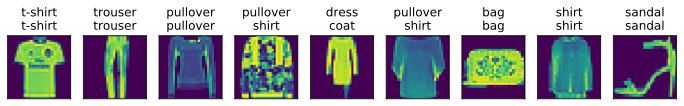

In [31]:
for X,y in test_iter:
    break
    
true_labels=get_fashion_mnist_labels(y.asnumpy())
pred_labels=get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles=[true +'\n'+pred for true,pred in zip(true_labels,pred_labels)]

show_fashion_mnist(X[0:9],titles[0:9])

### 小结
* softmax回归做多类别分类，与训练线性回归相比，softmax回归的步骤和他基本类似：获取数据、定义模型和损失函数并使用优化算法训练模型。

## softmax回归的简洁实现
使用gluon实现softmax回归模型。</br>
* 首先导入包和模块

In [57]:
import matplotlib.pyplot as plt
import d2lzh as d2l
import imp
imp.reload(d2l)
from mxnet import gluon,init
from mxnet.gluon import loss as gloss,nn
%matplotlib inline

### 获取和读取数据
* 使用fashion-mnist数据集，和上一节中设置的批量大小一样。

In [58]:
batch_size=256
train_iter=gdata.DataLoader(mnist_train.transform_first(transformer),batch_size,shuffle=True,num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False,num_workers=num_workers)

### 定义和初始化模型
* 模型输出为10个

In [59]:
net=nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

### softmax和交叉熵损失函数
* 分开定义softmax和交叉函数可能会造成数值不稳定，因此gluon提供了一个包含softmax运算和交叉熵损失计算的函数，他的数值稳定性好。

In [60]:
loss=gloss.SoftmaxCrossEntropyLoss()

### 定义优化算法

In [61]:
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.1})

### 训练模型

In [62]:
num_epochs=5
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,trainer)

epoch 1, loss 0.7887, train acc 0.747, test acc 0.806
epoch 2, loss 0.5749, train acc 0.811, test acc 0.826
epoch 3, loss 0.5279, train acc 0.824, test acc 0.828
epoch 4, loss 0.5057, train acc 0.830, test acc 0.835
epoch 5, loss 0.4892, train acc 0.836, test acc 0.842


In [63]:
net

Sequential(
  (0): Dense(784 -> 10, linear)
)

## 多层感知器
### 激活函数
#### relu函数
* $ReLU(x)=max(x,0)$

In [2]:
import d2lzh as d2l
import imp
imp.reload(d2l)

from mxnet import autograd,nd
import matplotlib.pyplot as plt
%matplotlib inline

* 定义一个绘图函数xyplot

In [3]:
def xyplot(x_vals,y_vals,name):
    d2l.set_figsize(figsize=(5,2.5))
    d2l.plt.plot(x_vals.asnumpy(),y_vals.asnumpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name+'(x)')
    d2l.plt.show()

* 绘制relu函数
ndarray 自带relu函数

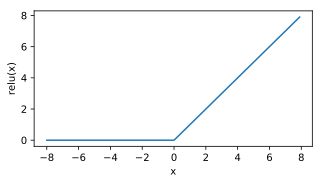

In [4]:
x=nd.arange(-8.0,8.0,0.1)
x.attach_grad()
with autograd.record():
    y=x.relu()
xyplot(x,y,'relu')

* 绘制relu求导

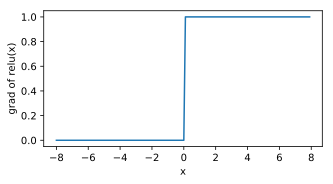

In [5]:
y.backward()
xyplot(x,x.grad,name='grad of relu')

#### sigmoid函数
$sigmoid(x)=\frac{1}{1+exp(-x)}$

* 绘制sigmoid函数

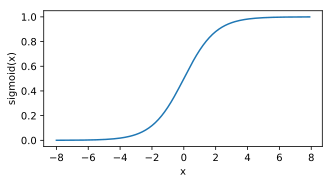

In [6]:
with autograd.record():
    y=x.sigmoid()
xyplot(x,y,name='sigmoid')

* 绘制sigmoid的导数
$sigmoid'(x)=sigmoid(x)(1-sigmoid(x))$

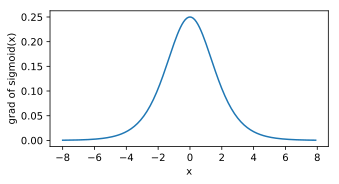

In [7]:
y.backward()
xyplot(x,x.grad,name='grad of sigmoid')

#### tanh函数
* 将元素的值变化到-1到1之间：$tanh(x)=\frac{1-exp(-2x)}{1+exp(-2x)}$在x接近0处接近为线性变换。关于坐标原点对称。

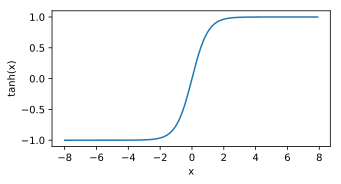

In [8]:
with autograd.record():
    y=x.tanh()
xyplot(x,y,name='tanh')

* 绘制tanh的导数，$tanh'(x)=1-tanh^2(x)$，x=0时导数达到最大值1，当x输入偏离0时导数几近于0.

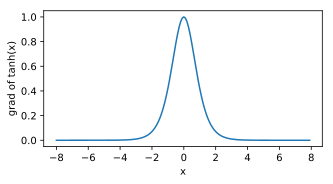

In [9]:
y.backward()
xyplot(x,x.grad,name='grad of tanh')

## 多层感知器从0开始实现
### 导数库和包

In [10]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

### 读取数据

In [11]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

### 定义模型参数

In [12]:
num_inputs,num_outputs,num_hiddens_0,num_hiddens_1=784,10,256,128

W1=nd.random.normal(scale=0.01,shape=(num_inputs,num_hiddens_0))
b1=nd.zeros(num_hiddens_0)
W2=nd.random.normal(scale=0.01,shape=(num_hiddens_0,num_hiddens_1))
b2=nd.zeros(num_hiddens_1)
W3=nd.random.normal(scale=0.01,shape=(num_hiddens_1,num_outputs))
b3=nd.zeros(num_outputs)
params=[W1,b1,W2,b2,W3,b3]

for param in params:
    param.attach_grad()

### 定义激活函数
* 使用maximum来实现relu，而不是直接调用relu。 <br/> maximum(lhs,rhs):逐个元素比较，返回lhs和rhs中的最大值，shape不一样的，会产生广播。[参考](http://mxnet.apache.org/api/python/ndarray/ndarray.html?highlight=maximum#mxnet.ndarray.maximum)

In [13]:
def relu(X):
    return nd.maximum(X,0)

### 定义模型

In [14]:
def net(X):
    X=X.reshape((-1,num_inputs))
    H0=relu(nd.dot(X,W1)+b1)
    H1=relu(nd.dot(H0,W2)+b2)
    return nd.dot(H1,W3)+b3

### 定义损失函数

In [15]:
loss=gloss.SoftmaxCrossEntropyLoss()

### 训练模型

In [16]:
num_epochs,lr=10,0.1
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch 1, loss 1.8395, train acc 0.291, test acc 0.601
epoch 2, loss 0.9369, train acc 0.642, test acc 0.706
epoch 3, loss 0.7054, train acc 0.742, test acc 0.764
epoch 4, loss 0.6024, train acc 0.783, test acc 0.814
epoch 5, loss 0.5390, train acc 0.805, test acc 0.827
epoch 6, loss 0.4992, train acc 0.822, test acc 0.837
epoch 7, loss 0.4623, train acc 0.834, test acc 0.845
epoch 8, loss 0.4399, train acc 0.842, test acc 0.851
epoch 9, loss 0.4180, train acc 0.849, test acc 0.860
epoch 10, loss 0.4013, train acc 0.855, test acc 0.859


In [25]:
d2l.train_ch3??

## 多层感知器的简单实现

In [17]:
import d2lzh as d2l
from mxnet import gluon,init
from mxnet.gluon import loss as gloss,nn

### 定义模型

In [18]:
net=nn.Sequential()
net.add(nn.Dense(128,activation='sigmoid'))
net.add(nn.Dense(64,activation='sigmoid'))
net.add(nn.Dense(32,activation='sigmoid'))
net.add(nn.Dense(10))

net.initialize(init.Normal(sigma=0.1))

### 读取数据并训练模型

In [19]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

loss=gloss.SoftmaxCrossEntropyLoss()
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.5})
num_epochs=5
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,trainer)

epoch 1, loss 2.0293, train acc 0.214, test acc 0.444
epoch 2, loss 1.2434, train acc 0.505, test acc 0.571
epoch 3, loss 0.9048, train acc 0.660, test acc 0.703
epoch 4, loss 0.7319, train acc 0.728, test acc 0.751
epoch 5, loss 0.6436, train acc 0.762, test acc 0.782


## 模型选择、欠拟合和过拟合

### 多项式函数拟合实验

* 导入需要的包

In [21]:
import d2lzh as d2l
from mxnet import autograd,gluon,nd
from mxnet.gluon import data as gdata,loss as gloss
%matplotlib inline

#### 生成数据集<br/>
$y=1.2x-3.4x^2+5.6x^3+5+noise$<br/>noise服从均值为0，标准差为0.1的正态分布。训练和测试样本数都为100.

In [23]:
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features=nd.random.normal(shape=(n_train+n_test,1))
poly_features=nd.concat(features,nd.power(features,2),nd.power(features,3),dim=1)

labels=nd.dot(poly_features,nd.array(true_w))+true_b
labels+=nd.random.normal(scale=0.1,shape=labels.shape)

In [25]:
features[:2],poly_features[:2],labels[:2]

(
 [[-0.15755391]
  [-1.1489013 ]]
 <NDArray 2x1 @cpu(0)>, 
 [[-0.15755391  0.02482324 -0.003911  ]
  [-1.1489013   1.3199743  -1.5165203 ]]
 <NDArray 2x3 @cpu(0)>, 
 [ 4.58534   -9.3233795]
 <NDArray 2 @cpu(0)>)

#### 定义、训练和测试模型

- 定义绘图函数,y轴使用对数尺度

In [26]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals,linestyle=':')
        d2l.plt.legend(legend)

* 模型定义函数

In [30]:
num_epochs,loss=100,gloss.L2Loss()
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size=min(10,train_labels.shape[0])
    train_iter=gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)
    trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.01})
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                y_hat=net(X)
                l=loss(y_hat,y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    print("final epoch: train loss",train_ls[-1],'test loss',test_ls[-1])
    semilogy(range(1,num_epochs+1),train_ls,'epoch','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('weight:',net[0].weight.data().asnumpy(),'\nbias:',net[0].bias.data().asnumpy())

#### 三阶多项式函数

final epoch: train loss 0.004466564 test loss 0.0047342507
weight: [[ 1.2074761 -3.3909376  5.60079  ]] 
bias: [4.9785023]


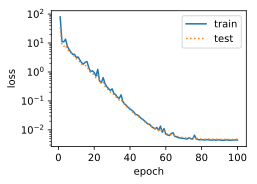

In [31]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:])

#### 欠拟合

final epoch: train loss 223.61629 test loss 79.110085
weight: [[22.84522]] 
bias: [3.02535]


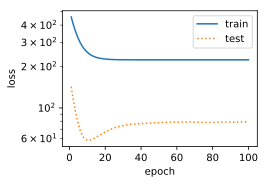

In [33]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

#### 训练样本不足 过拟合

final epoch: train loss 4.8648367 test loss 49.622902
weight: [[ 1.6437143 -2.2257106  2.6100528]] 
bias: [0.66630834]


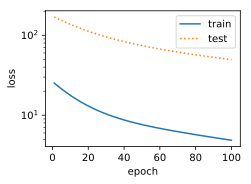

In [36]:
fit_and_plot(poly_features[:2,:],poly_features[n_train:,:],labels[:2],labels[n_train:])

## 权重衰减 
**weight decay**应对过拟合问题的常用方法

* L2正则化又叫权重衰减，权值更新是乘以小于1的值在减去不含惩罚项的梯度。<br/>
权值更新方式: <br/>
$w=w*weight\_decay-lr*\frac{dEin}{dw}$

### 高维线性回归实验

* 以$y=0.05+\sum_{i=1}^p0.01x_i+noise$生成样本数据的标签，noise为均值为0，标准差为0.01的正太分布。设p=200，即200的高维数据。样本数为20个。

In [37]:
import d2lzh as d2l
from mxnet import autograd,gluon,init,nd
from mxnet.gluon import data as gdata,loss as gloss,nn
%matplotlib inline

In [38]:
n_train,n_test,num_inputs=20,100,200
true_w,true_b=nd.ones((num_inputs,1))*0.01,0.05

features=nd.random.normal(shape=(n_train+n_test,num_inputs))
labels=nd.dot(features,true_w)+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)
train_features,test_features=features[:n_train,:],features[n_train:,:]
train_labels,test_labels=labels[:n_train],labels[n_train:]

### 从零开始实现

* 定义初始化模型参数函数。

In [41]:
def init_params():
    w=nd.random.normal(scale=0.1,shape=(num_inputs,1))
    b=nd.zeros(1)
    w.attach_grad()
    b.attach_grad()
    return w,b

* 定义L2范数惩罚项:$\frac{1}{2}||w||^2$

In [40]:
def L2_penalty(w):
    return (w**2).sum()/2

* 定义训练和测试

In [51]:
batch_size,num_epochs,lr=2,100,0.003
net,loss=d2l.linreg,d2l.squared_loss
train_iter=gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)

def fit_and_plot(lambd):
    w,b=init_params()
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                y_hat=net(X,w,b)
                l=loss(y_hat,y)+lambd*L2_penalty(w)
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().asscalar())
    d2l.semilogy(range(1,num_epochs+1),train_ls,'epoch','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w:',w.norm().asscalar())

* 观测过拟合

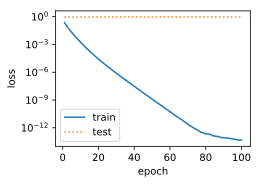

L2 norm of w: 1.3891131


In [52]:
fit_and_plot(lambd=0)

* 使用权重衰减

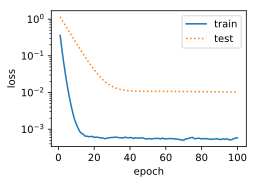

L2 norm of w: 0.038882233


In [53]:
fit_and_plot(lambd=3)

#### 简单实现

In [55]:
def fit_and_plot_gluon(wd):
    '''
    wd:weight decay
    '''
    net=nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    
    #对权重参数衰减，权重名称一般以weight结尾。
    train_w=gluon.Trainer(net.collect_params('.*weight'),'sgd',{'learning_rate':lr,'wd':wd})
    
    #不对偏置进行衰减
    train_b=gluon.Trainer(net.collect_params('.*bias'),'sgd',{'learning_rate':lr})
    
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                l=loss(net(X),y)
            l.backward()
            train_w.step(batch_size)
            train_b.step(batch_size)
        train_ls.append(loss(net(train_features),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    d2l.semilogy(range(1,num_epochs+1),train_ls,'epoch','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w:',net[0].weight.data().norm().asscalar())

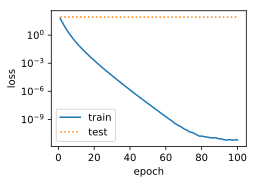

L2 norm of w: 14.020636


In [56]:
fit_and_plot_gluon(wd=0)

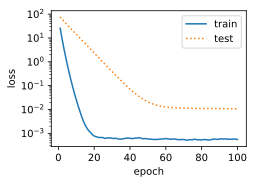

L2 norm of w: 0.039889414


In [57]:
fit_and_plot_gluon(wd=3)

## 丢弃法 从零开始

* 导入相关库

In [15]:
import d2lzh as d2l
import imp
imp.reload(d2l)
from mxnet import autograd,nd,init,gluon
from mxnet.gluon import loss as gloss,nn

* 定义dropout函数，以drop_prob的概率丢弃NDarray输入X中的元素。以drop_prob概率丢弃，之后将保留的元素在除以(1-drop_prob)

In [16]:
def dropout(X,drop_prob):
    assert 0<=drop_prob<=1
    keep_prob=1-drop_prob
    #这种情况把全部元素都丢弃
    if keep_prob==0:
        return X.zeros_like()
    mask=nd.random.uniform(0,1,X.shape)<keep_prob
    return mask*X/keep_prob

* 测试以下

In [17]:
X=nd.arange(16).reshape((2,8))
dropout(X,0)


[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]]
<NDArray 2x8 @cpu(0)>

In [18]:
dropout(X,0.5)


[[ 0.  0.  4.  6.  0. 10. 12. 14.]
 [ 0.  0. 20.  0. 24.  0.  0.  0.]]
<NDArray 2x8 @cpu(0)>

In [19]:
dropout(X,1)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
<NDArray 2x8 @cpu(0)>

* 定义模型参数

In [33]:
num_inputs,num_outputs,num_hiddens1,num_hiddens2=784,10,256,256

W1=nd.random.normal(scale=0.1,shape=(num_inputs,num_hiddens1))
b1=nd.zeros(num_hiddens1)
W2=nd.random.normal(scale=0.1,shape=(num_hiddens1,num_hiddens2))
b2=nd.zeros(num_hiddens2)
W3=nd.random.normal(scale=0.1,shape=(num_hiddens2,num_outputs))
b3=nd.zeros(num_outputs)

params=[W1,b1,W2,b2,W3,b3]

for param in params:
    param.attach_grad()

* 定义模型

In [34]:
drop_prob1,drop_prob2=0.5,0.2

def net(X):
    X=X.reshape((-1,num_inputs))
    H1=nd.relu(nd.dot(X,W1)+b1)
    if autograd.is_training(): #只在训练模型时使用丢弃法，测试时不用
        H1=dropout(H1,drop_prob1)
    H2=nd.relu(nd.dot(H1,W2)+b2)
    if autograd.is_training():
        H2=dropout(H2,drop_prob2)
    return nd.dot(H2,W3)+b3

* 训练和测试模型

In [35]:
num_epochs,lr,batch_size=10,0.5,256
loss=gloss.SoftmaxCrossEntropyLoss()

train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch 1, loss 1.0821, train acc 0.632, test acc 0.719
epoch 2, loss 0.6502, train acc 0.751, test acc 0.825
epoch 3, loss 0.5675, train acc 0.791, test acc 0.799
epoch 4, loss 0.5279, train acc 0.806, test acc 0.834
epoch 5, loss 0.5029, train acc 0.816, test acc 0.853
epoch 6, loss 0.4802, train acc 0.824, test acc 0.846
epoch 7, loss 0.4676, train acc 0.827, test acc 0.850
epoch 8, loss 0.4564, train acc 0.832, test acc 0.862
epoch 9, loss 0.4453, train acc 0.835, test acc 0.858
epoch 10, loss 0.4327, train acc 0.840, test acc 0.852


* 简洁实现

In [36]:
net=nn.Sequential()
net.add(nn.Dense(256,activation='relu'),nn.Dropout(0))
net.add(nn.Dense(256,activation='relu'),nn.Dropout(0))
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [37]:
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':lr})
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,trainer)

epoch 1, loss 1.1589, train acc 0.546, test acc 0.771
epoch 2, loss 0.5642, train acc 0.789, test acc 0.833
epoch 3, loss 0.4604, train acc 0.828, test acc 0.856
epoch 4, loss 0.4194, train acc 0.845, test acc 0.848
epoch 5, loss 0.4191, train acc 0.848, test acc 0.865
epoch 6, loss 0.3719, train acc 0.862, test acc 0.866
epoch 7, loss 0.3588, train acc 0.867, test acc 0.868
epoch 8, loss 0.3415, train acc 0.874, test acc 0.874
epoch 9, loss 0.3262, train acc 0.880, test acc 0.874
epoch 10, loss 0.3113, train acc 0.885, test acc 0.883


In [30]:
help(d2l.train_ch3)

Help on function train_ch3 in module d2lzh:

train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None)
    Train and evaluate a model with CPU.



# 深度学习计算
## 模型构造
处理使用Sequential类构造模型外，我们还可以使用一种基于Block类的模型构造方法，他让模型构造更灵活。

### 继承Block类来构造模型
Block类是nn模块里提供的一个模型构造类，这里我们定义多层感知器MLP类继承于Block类的__init__函数和forward函数，分布用于创建模型参数和定义前向计算。

In [38]:
from mxnet import nd
from mxnet.gluon import nn

In [39]:
class MLP(nn.Block):
    #声明带有模型参数的层，这里声明两个全连接层
    def __init__(self,**kwargs):
        #调用MLP的父类Block构造函数来进行必要的初始化
        super(MLP,self).__init__(**kwargs)
        self.hidden=nn.Dense(256,activation='relu')#隐藏层
        self.output=nn.Dense(10)#输出层
    
    #定义模型的前向计算
    def forward(self,X):
        return self.output(self.hidden(X))

* 实例化MLP类得到模型net，其中net(X)会调用MLP类继承自Block类的\_\_call\_\_函数，这个函数将调用MLP类定义的forward()函数来完成计算。

In [40]:
X=nd.random.uniform(shape=(2,20))
net=MLP()
net.initialize()
net(X)


[[ 0.03879225  0.06417096 -0.04158121 -0.00560513  0.07194726  0.03215756
   0.02945835  0.03556488  0.01697809 -0.00102281]
 [ 0.00420755  0.05947459 -0.0336378  -0.05264632  0.03310325  0.03391339
   0.01869689  0.03401055  0.03781362 -0.01116293]]
<NDArray 2x10 @cpu(0)>